<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/78_C_DOE_DBCA_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2023**
## **TEMA 1: Diseños completamente aleatorizados DCA**
### **1.1 Librerias básicas**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


# **2.0. Diseños en Bloques Completos al Azar - DBCA**

### **2.1 Problema de Aplicación.** _Se evalúa la eficacia de sulfato ferroso a 4 diferentes concentraciones $2$, $2.5$, $3$, y $4$ $mg/kg/día$ para combatir la anemia en personas con desnutrición. Dada la variabilidad de pesos y sexos, se decidió agrupar en bloque de personas por pesos lo más semejantes posibles. Se les dio el tratamiento durante 4 meses y se procedió a determinar su volumen sanguíneo dando los siguientes resultados:_

|Pesos\Tratamientos|T1 |T2| T3| T4| Total ($Y_{.j}$)|
|:--:|:--:|:--:|:--:|:--:|:--:|
|I |4.1| 6.5| 4.1| 4.9| 19.6|
|II |4.1| 5.3| 4.0| 6.2| 19.6|
|III |6.5| 6.9| 4.5| 4.8| 22.7|
|IV |4.3| 6.8| 4.3| 4.2| 19.6|
|V |6.0| 6.5| 4.1| 6.9| 23.5|
|Total Tratamiento ($Y_i.$)| 25| 32| 21| 27| 105|

- **Las hipótesis a probar: Para los tratamientos**
$$H_{01}: \mu_{T_1}=\mu_{T_2}=\mu_{T_3}=\mu_{T_4}$$ $$Vs$$ $$H_{a1}: \mu_{T_i}\neq\mu_{T_j}$$ _Al menos un tratamiento es diferente_

- **Las hipótesis a probar: Para los Bloques**
$$H_{02}: \mu_{B_1}=\mu_{B_2}=\mu_{B_3}=\mu_{B_4}=\mu_{B_4}$$ $$Vs$$ $$H_{a2}: \mu_{B_i}\neq\mu_{B_j}$$  _Al menos un bloque (pesos) es
diferente_

# **2.2 El DataFrame de los datos**

In [ ]:
# **2.2 El DataFrame de los datos**
Pesos = (['B1']*4+['B2']*4+['B3']*4+['B4']*4+['B5']*4)*1
S_Ferroso = (['T1']*1+['T2']*1+['T3']*1+['T4']*1)*5
V_Sanguineo =[4.1, 6.5, 4.1, 4.9,  4.1, 5.3, 4.0, 6.2,  6.5, 6.9, 4.5, 4.8, 4.3, 6.8, 4.3, 4.2,  6.0, 6.5, 4.1, 6.9]
dic_DBCA ={'Pesos': Pesos,'S_Ferroso': S_Ferroso, 'V_Sanguineo':V_Sanguineo}

DBCA  = pd.DataFrame(dic_DBCA)
DBCA

,Pesos,S_Ferroso,V_Sanguineo
0,B1,T1,4.1
1,B1,T2,6.5
2,B1,T3,4.1
3,B1,T4,4.9
4,B2,T1,4.1
5,B2,T2,5.3
6,B2,T3,4.0
7,B2,T4,6.2
8,B3,T1,6.5
9,B3,T2,6.9


# **2.3. Analisis descriptivo de la variable**

In [ ]:
# **2.3. Analisis descriptivo de la variable**
DBCA.describe()


,V_Sanguineo
count,20.000000
mean,5.250000
std,1.139021
min,4.000000
25%,4.175000
50%,4.850000
75%,6.500000
max,6.900000


# **2.4 Acediendo a algunos atributos del DataFrame**

In [ ]:
# **a Acediendo al atributo columns**
DBCA.columns

Index(['Pesos', 'S_Ferroso', 'V_Sanguineo'], dtype='object')

In [ ]:
# **b Accediendo al atributo tipo de datos de cada columna**
DBCA.dtypes

Pesos           object
S_Ferroso       object
V_Sanguineo    float64
dtype: object

In [ ]:
#**c. Contar las observaciones**
DBCA["Pesos"].value_counts()

B1    4
B2    4
B3    4
B4    4
B5    4
Name: Pesos, dtype: int64

In [ ]:
#**d. Contar las observaciones**
DBCA["S_Ferroso"].value_counts()

T1    5
T2    5
T3    5
T4    5
Name: S_Ferroso, dtype: int64

In [ ]:
#**e. Contar las observaciones**
DBCA["V_Sanguineo"].value_counts()

4.1    4
6.5    3
6.9    2
4.3    2
4.9    1
5.3    1
4.0    1
6.2    1
4.5    1
4.8    1
6.8    1
4.2    1
6.0    1
Name: V_Sanguineo, dtype: int64

In [ ]:
DBCA[["Pesos","V_Sanguineo"]].describe()

,V_Sanguineo
count,20.000000
mean,5.250000
std,1.139021
min,4.000000
25%,4.175000
50%,4.850000
75%,6.500000
max,6.900000


In [ ]:
DBCA[["Pesos",'V_Sanguineo']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Pesos,B1,B1,B1,B1,B2,B2,B2,B2,B3,B3,B3,B3,B4,B4,B4,B4,B5,B5,B5,B5
V_Sanguineo,4.1,6.5,4.1,4.9,4.1,5.3,4.0,6.2,6.5,6.9,4.5,4.8,4.3,6.8,4.3,4.2,6.0,6.5,4.1,6.9


# **2.5. BoxPlot para DBCA : V_Sanguineo vs S_Ferroso**

<Axes: title={'center': 'V_Sanguineo vs S_Ferroso'}, xlabel='S_Ferroso', ylabel='V_Sanguineo'>

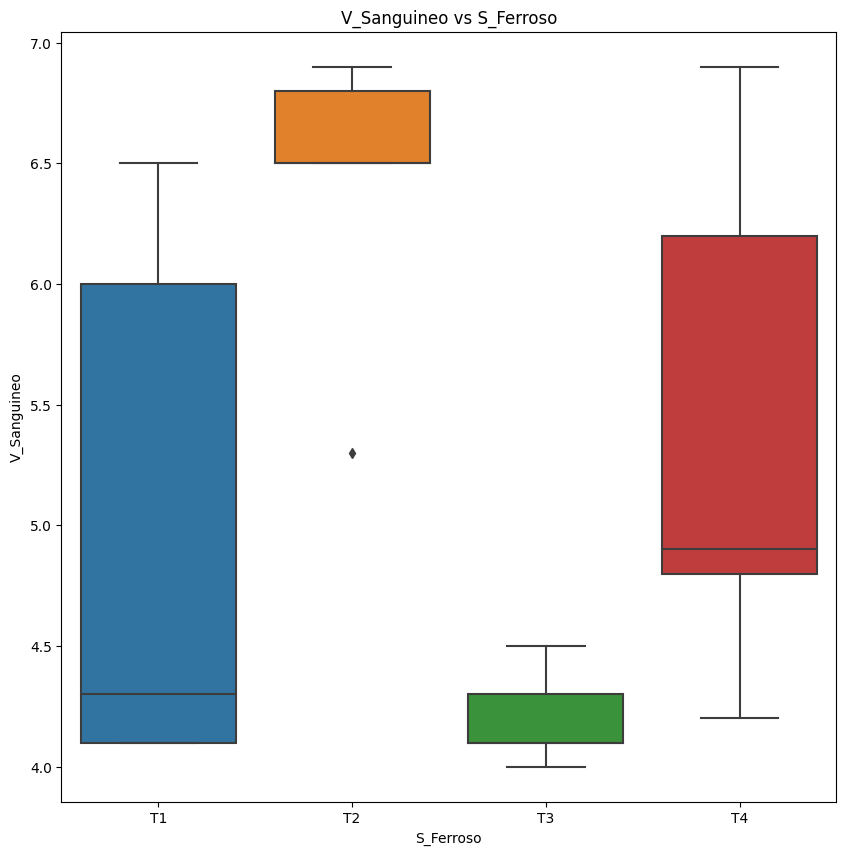

In [ ]:
# **2.5. BoxPlot para DBCA: V_Sanguineo vs S_Ferroso**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('V_Sanguineo vs S_Ferroso')
sns.boxplot(x="S_Ferroso", y='V_Sanguineo',data=DBCA,ax=ax)


# **2.6. BoxPlot para DBCA: V_Sanguineo vs Pesos**

<Axes: title={'center': 'V_Sanguineo vs Pesos'}, xlabel='Pesos', ylabel='V_Sanguineo'>

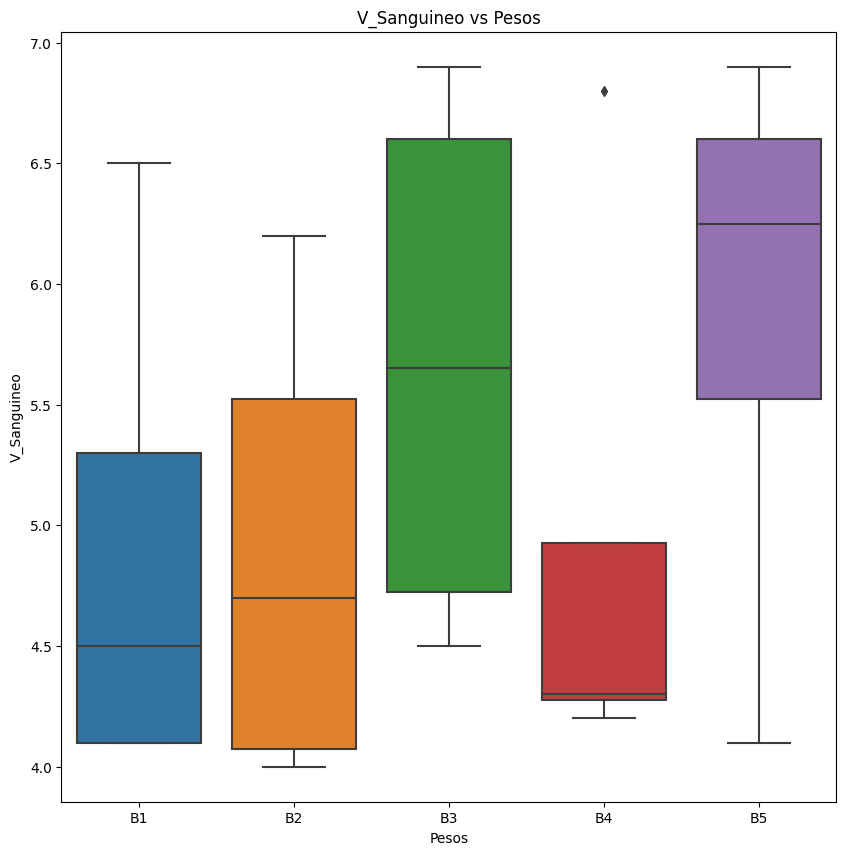

In [ ]:
# **2.6. BoxPlot para DBCA: V_Sanguineo vs Pesos**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('V_Sanguineo vs Pesos')
sns.boxplot(x="Pesos", y='V_Sanguineo',data=DBCA,ax=ax)


# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**

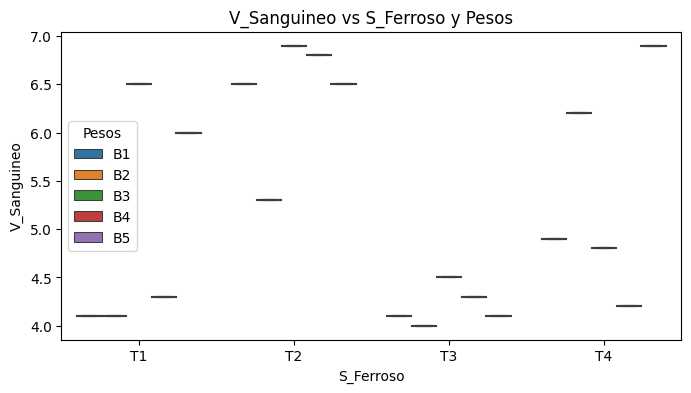

In [ ]:
# **2.7 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('V_Sanguineo vs S_Ferroso y Pesos')
sns.boxplot(x="S_Ferroso", y="V_Sanguineo", hue='Pesos', data=DBCA, ax=ax);

# **2.8 Análisis de Varianza Tipo I**

In [ ]:
# **2.8 Análisis de Varianza Tipo I**
modeloDBCA = ols("V_Sanguineo ~ S_Ferroso + Pesos", data = DBCA).fit()
anova_result2 = sm.stats.anova_lm(modeloDBCA, typ=2)
print (anova_result2)

           sum_sq    df         F    PR(>F)
S_Ferroso  12.550   3.0  6.015578  0.009644
Pesos       3.755   4.0  1.349910  0.307973
Residual    8.345  12.0       NaN       NaN


In [ ]:
anova_result2.T

,S_Ferroso,Pesos,Residual
sum_sq,12.550000,3.755000,8.345
df,3.000000,4.000000,12.000
F,6.015578,1.349910,NaN
PR(>F),0.009644,0.307973,NaN


In [ ]:
print(modeloDBCA.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6500      0.527     

# **2.9 Análisis de Varianza Tipo II**

In [ ]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("V_Sanguineo ~ S_Ferroso + Pesos", data = DBCA).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6500      0.527     

In [ ]:
anova_result3 = sm.stats.anova_lm(modeloDBCA2, typ=2)
anova_result3.T

,S_Ferroso,Pesos,Residual
sum_sq,12.550000,3.755000,8.345
df,3.000000,4.000000,12.000
F,6.015578,1.349910,NaN
PR(>F),0.009644,0.307973,NaN


In [ ]:
# **2.9 Análisis de Varianza Tipo II**
modeloDBCA2 = smf.ols("V_Sanguineo ~ S_Ferroso-1 + Pesos", data = DBCA).fit()
print(modeloDBCA2.summary())

                            OLS Regression Results                            
Dep. Variable:            V_Sanguineo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 09 May 2023   Prob (F-statistic):             0.0321
Time:                        22:58:26   Log-Likelihood:                -19.638
No. Observations:                  20   AIC:                             55.28
Df Residuals:                      12   BIC:                             63.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
S_Ferroso[T1]     4.6500      0.527      8.817

# **2.10 Comparaciones Múltiples:S_Ferroso**

group1,group2,meandiff,p-adj,lower,upper,reject
T1,T2,1.4,0.0903,-0.1736,2.9736,False
T1,T3,-0.8,0.4858,-2.3736,0.7736,False
T1,T4,0.4,0.8848,-1.1736,1.9736,False
T2,T3,-2.2,0.0051,-3.7736,-0.6264,True
T2,T4,-1.0,0.3011,-2.5736,0.5736,False
T3,T4,1.2,0.1705,-0.3736,2.7736,False


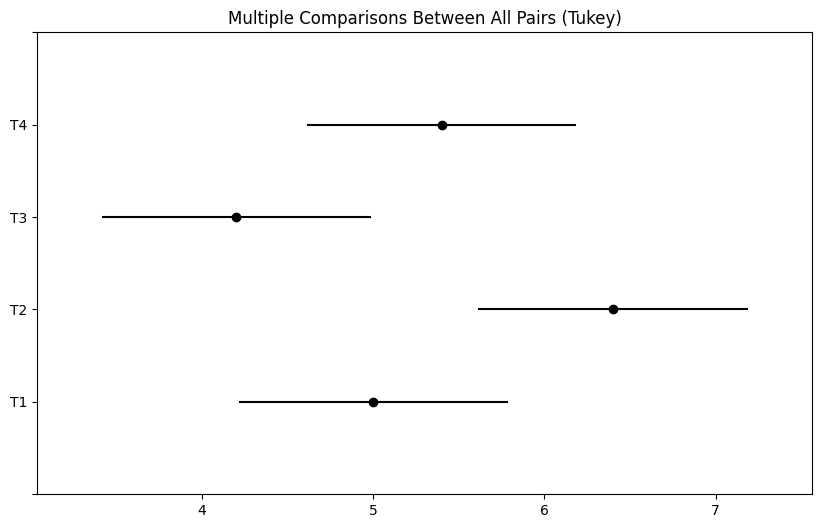

In [ ]:

# **2.10 Comparaciones Múltiples:S_Ferroso**
tukey = pairwise_tukeyhsd(endog=DBCA["V_Sanguineo"],     # Data
                          groups=DBCA["S_Ferroso"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **2.11 Comparaciones Múltiples:Pesos**

group1,group2,meandiff,p-adj,lower,upper,reject
B1,B2,-0.0,1.0,-2.5771,2.5771,False
B1,B3,0.775,0.8814,-1.8021,3.3521,False
B1,B4,-0.0,1.0,-2.5771,2.5771,False
B1,B5,0.975,0.7686,-1.6021,3.5521,False
B2,B3,0.775,0.8814,-1.8021,3.3521,False
B2,B4,0.0,1.0,-2.5771,2.5771,False
B2,B5,0.975,0.7686,-1.6021,3.5521,False
B3,B4,-0.775,0.8814,-3.3521,1.8021,False
B3,B5,0.2,0.9992,-2.3771,2.7771,False
B4,B5,0.975,0.7686,-1.6021,3.5521,False


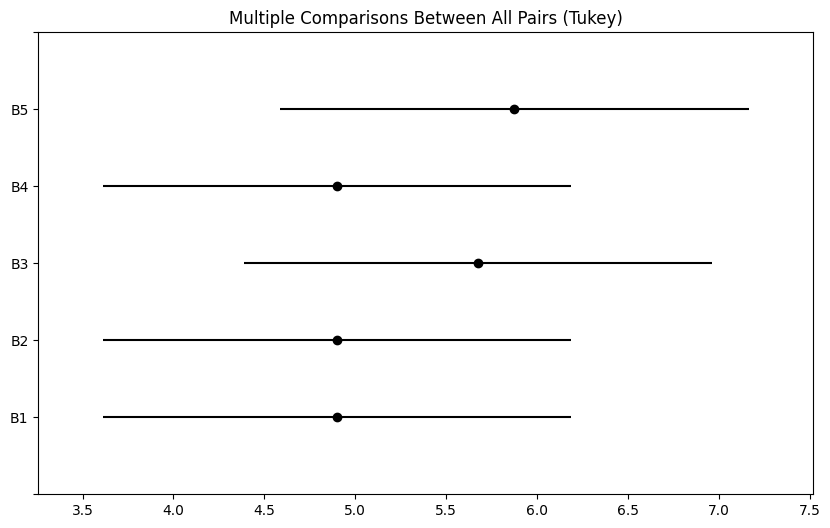

In [ ]:

# **2.11 Comparaciones Múltiples:Pesos**
tukey = pairwise_tukeyhsd(endog=DBCA["V_Sanguineo"],     # Data
                          groups=DBCA["Pesos"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **2.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**

In [ ]:

# **3.12 Supuesto del Modelo: Normalidad Prueba de  Shapiro Wilks**
w, pvalue = stats.shapiro(modeloDBCA.resid)
print(w, pvalue)

0.955288290977478 0.4545067846775055


# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

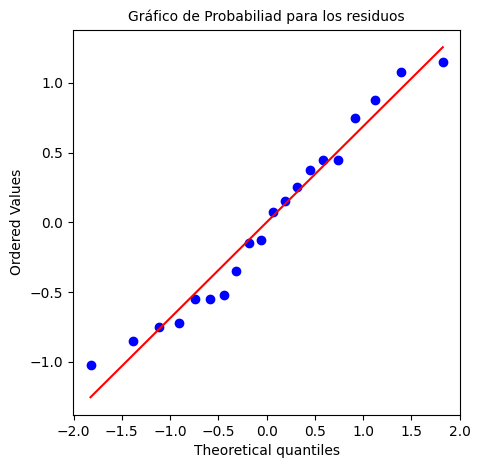

In [ ]:
# **2.13  Supuesto del Modelo: Normalidad: Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDBCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **2.14 Residuos del Modelo**

In [ ]:
# **2.14 Residuos del Modelo**
modeloDBCA.resid.describe()

count    2.000000e+01
mean     6.217249e-16
std      6.627296e-01
min     -1.025000e+00
25%     -5.500000e-01
50%     -2.500000e-02
75%      4.500000e-01
max      1.150000e+00
dtype: float64

# **2.15 Histograma de Residuos**

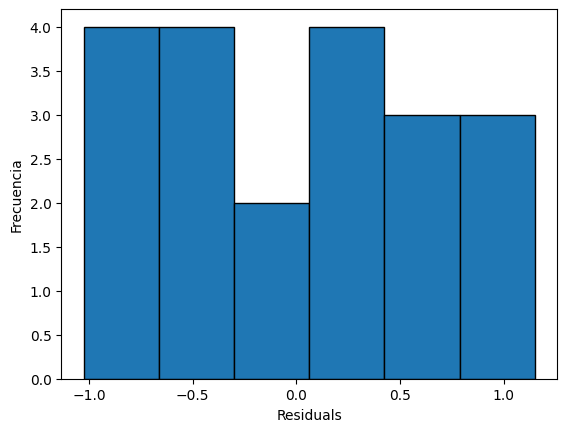

In [ ]:

# **2.15 Histograma de Residuos**
plt.hist(modeloDBCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()


# **2.16 Histograma + curva normal teórica**

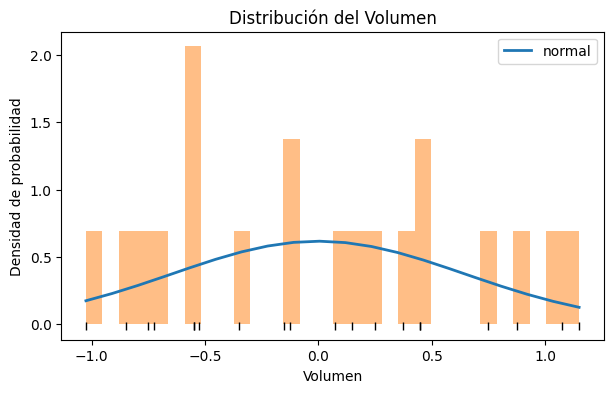

In [ ]:
# **2.16 Histograma + curva normal teórica**
# ==============================================================================
Volumen = modeloDBCA.resid
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Volumen)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Volumen), max(Volumen), num=20)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Volumen, density=True, bins=30,  alpha=0.5)
ax.plot(Volumen, np.full_like(Volumen, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Volumen')
ax.set_xlabel('Volumen')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

# **2.17 Gráfico Q-Q**

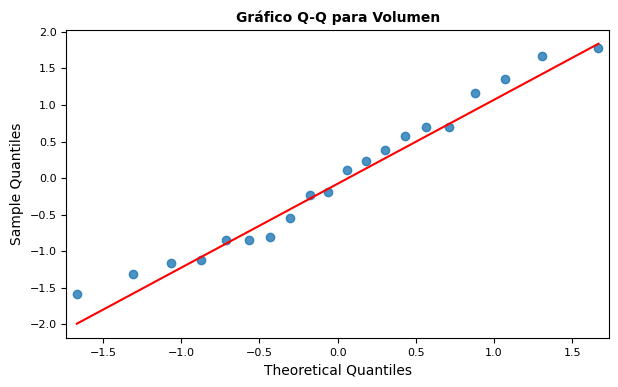

In [ ]:
# **2.17 Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Volumen,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Volumen', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

In [ ]:
# 2.18. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T1'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T2'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T3'],
             DBCA['V_Sanguineo'][DBCA['S_Ferroso'] == 'T4'])

LeveneResult(statistic=1.2169576059850375, pvalue=0.33572362617286766)